# outliers

In [ ]:
# outliers are data points that are very different from most of the values in a dataset
# they can happen because of data entry mistakes, measurements errors,or rare real world events
# sometimes outliers are useful (for example in fraud detection),but often they can reduce model accuracy and give misleading results
# that's why identifying and handling outliers is an important step in data preprocessing

In [ ]:
# how to detect a outliers
# they are two methods
#  1 IQR method   2 Z-score method


In [1]:
# the interquartile range method fouses on the spread of the middle 50% of data. 
# steps to detect outliers
# 1 find q1(25%)and Q3(75%)
#2 IQR=O3-O1
#3 lowee bound:Q1-1.5*iqr
#upper: Q3+1.5*iqr

In [2]:
import pandas as pd

In [7]:
df=pd.DataFrame({"study_hours":[1,2,3,4,5,6,7,8,9,20]})
df

,study_hours
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,20


In [8]:
df.describe()

,study_hours
count,10.000000
mean,6.500000
std,5.400617
min,1.000000
25%,3.250000
50%,5.500000
75%,7.750000
max,20.000000


# IQR Method

In [9]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr
outliers=df[(df<(lb))|(df>(ub))]

In [10]:
outliers

,study_hours
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,20.0


In [11]:
q1

study_hours    3.25
Name: 0.25, dtype: float64

In [12]:
q3

study_hours    7.75
Name: 0.75, dtype: float64

In [13]:
iqr

study_hours    4.5
dtype: float64

In [14]:
lb

study_hours   -3.5
dtype: float64

In [15]:
ub

study_hours    14.5
dtype: float64

# Z-Score method

In [ ]:
# z score method  is a statistical technique that detects outliers based on how far a data point is from the mean measured i terms of standard deviations.it assumes the data follows a normal distribution 
# a point with a very high or low z score (typically |z|>3) is flagged as an outlier beacuse it lies in the extreme tails of the distribution
# formula z=(x-u)/alpha
# x=data value , u=mean,alpha=standard deviation
# z>3 very strict (large datasets)
# z>2 pratical for small datasets


In [3]:
data=pd.DataFrame({
    "study":[1,2,3,4,5,6,7,8,9,20]
})
data

,study
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,20


In [4]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [5]:
z_score=np.abs(stats.zscore(data["study"]))
out=data[z_score>2]
out

,study
9,20


In [6]:
stats.zscore(data["study"])

0   -1.07349
1   -0.87831
2   -0.68313
3   -0.48795
4   -0.29277
5   -0.09759
6    0.09759
7    0.29277
8    0.48795
9    2.63493
Name: study, dtype: float64

In [9]:
z_score=np.abs(stats.zscore(data["study"]))
z_score

0    1.07349
1    0.87831
2    0.68313
3    0.48795
4    0.29277
5    0.09759
6    0.09759
7    0.29277
8    0.48795
9    2.63493
Name: study, dtype: float64

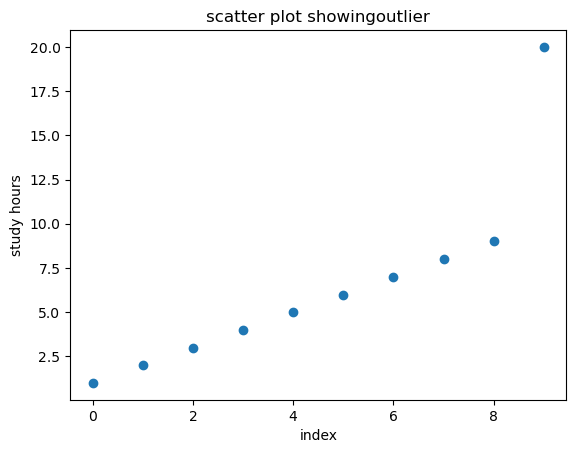

In [11]:
plt.scatter(range(len(data)),data["study"])
plt.xlabel("index")
plt.ylabel("study hours")
plt.title("scatter plot showingoutlier")
plt.show()

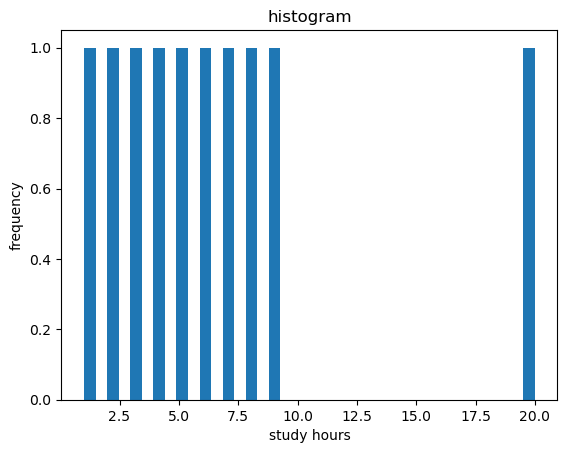

In [24]:
plt.hist(data["study"],bins=39)
plt.xlabel("study hours")
plt.ylabel("frequency")
plt.title("histogram")
plt.show()